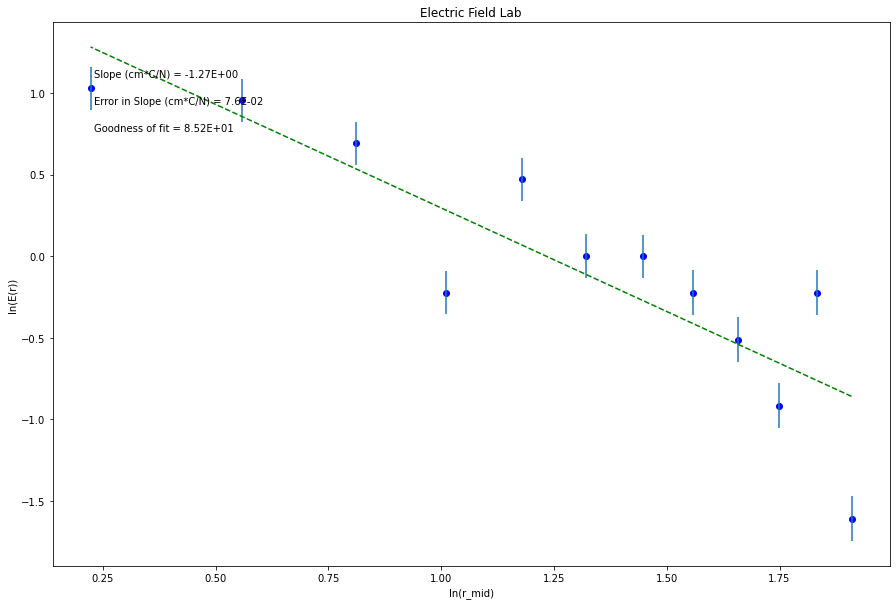

In [1]:
#Physics 218
#Jamison Talley
#2-8-22
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
x_var = np.array([1.909542505, 1.832581464, 1.749199855, 1.658228077, 1.558144618, 1.446918983, 
                 1.32175584, 1.178654996, 1.011600912, 0.810930216, 0.559615788, 0.223143551]) #cm
y_var = np.array([-1.609, -0.22314, -0.91629, -0.51082, -0.22314, 0, 0,
                  0.470003629, -0.223143551, 0.693147181, 0.955511445, 1.029619417]) #N/C

#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_y_var = np.array([0.13764924, 0.135503528, 0.13764924, 0.136420969, 0.13764924, 0.132548518, 
                     0.132924024, 0.132720799, 0.132548518, 0.131908925, 0.131640583, 0.131341098]) #N/C


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = x_var   #this should be the array you want to plot on the x axis
y = y_var
dy = err_y_var  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 

plt.xlabel('ln(r_mid)')
plt.ylabel('ln(E(r))')
plt.title('Electric Field Lab')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (cm*C/N) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (cm*C/N) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
